In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['did-it-rain-in-seattle-19482017']


In [2]:
df= pd.read_csv('../input/did-it-rain-in-seattle-19482017/seattleWeather_1948-2017.csv')

In [4]:
df.head(20)

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
5,1948-01-06,0.44,48,39,True
6,1948-01-07,0.41,50,40,True
7,1948-01-08,0.04,48,35,True
8,1948-01-09,0.12,50,31,True
9,1948-01-10,0.74,43,34,True


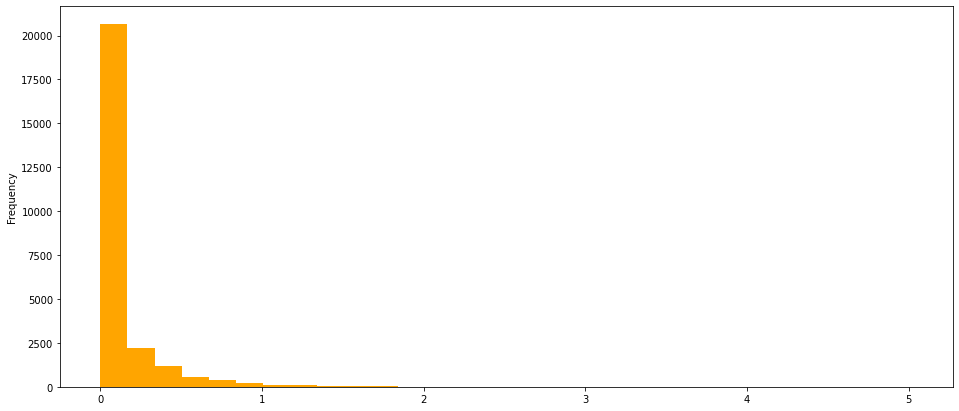

In [5]:
df['PRCP'].plot(kind='hist',bins=30,color='orange',figsize= (16,7))

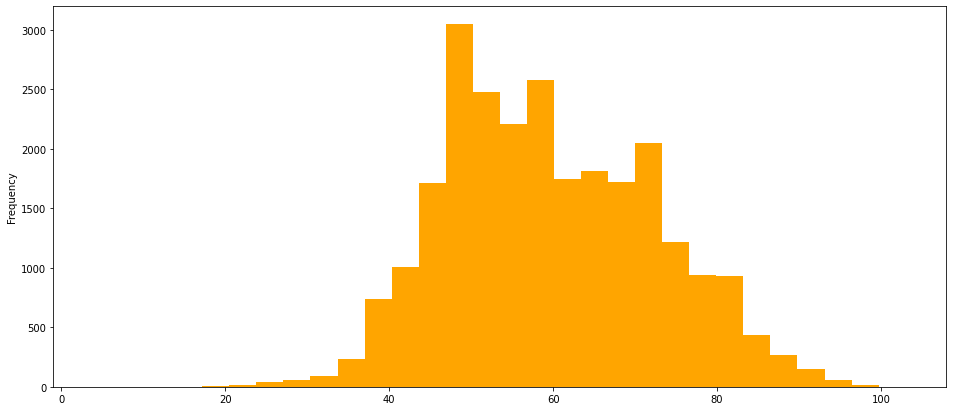

In [6]:
df['TMAX'].plot(kind='hist',bins=30,color='orange',figsize= (16,7))

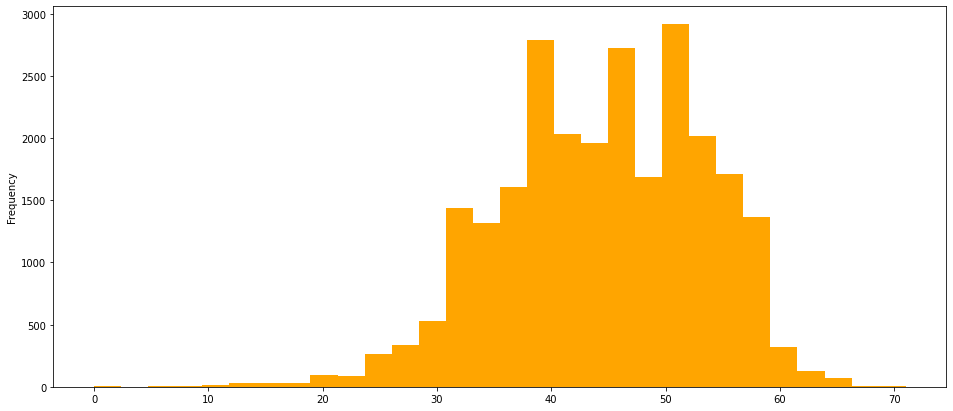

In [7]:
df['TMIN'].plot(kind='hist',bins=30,color='orange',figsize= (16,7))

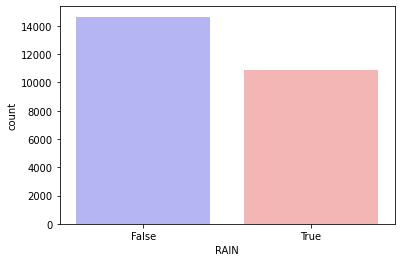

In [9]:
sns.countplot(x="RAIN", data=df, palette="bwr")

plt.show()

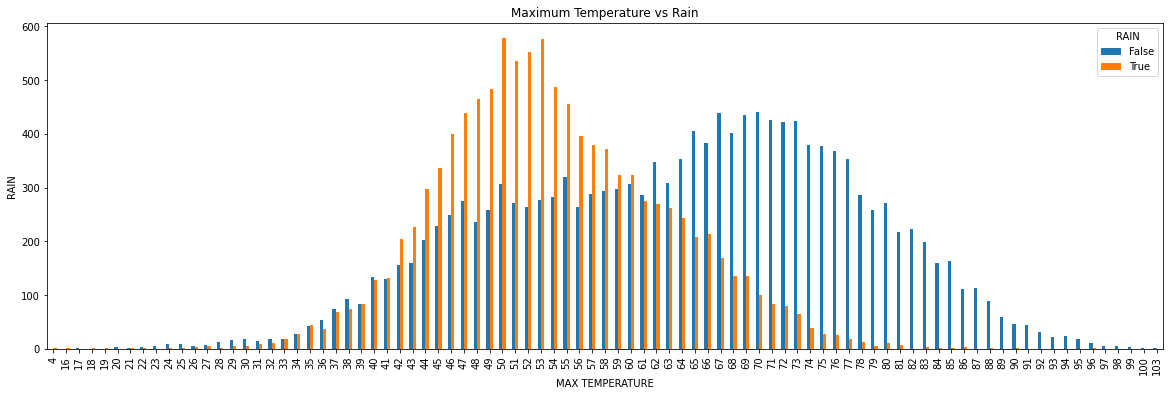

In [10]:
pd.crosstab(df.TMAX,df.RAIN).plot(kind="bar",figsize=(20,6))
plt.title('Maximum Temperature vs Rain')
plt.xlabel('MAX TEMPERATURE')
plt.ylabel('RAIN')
plt.savefig('tmaxr')
plt.show()

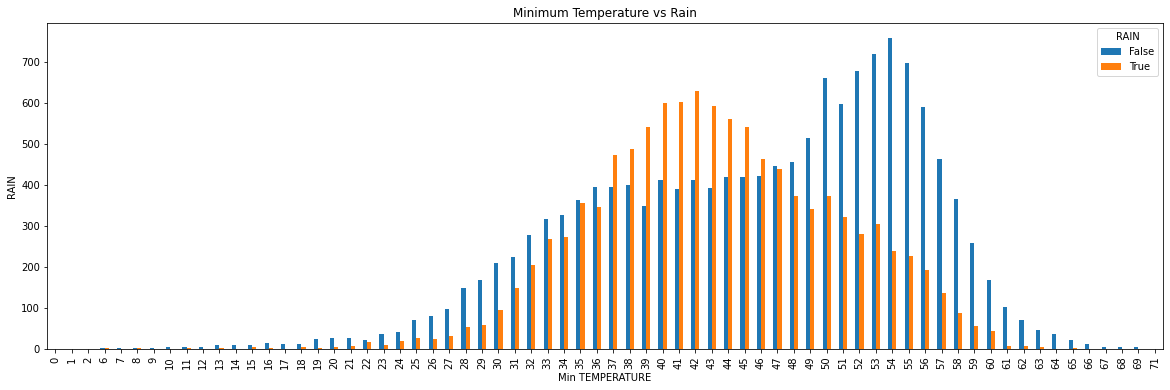

In [12]:
pd.crosstab(df.TMIN,df.RAIN).plot(kind="bar",figsize=(20,6))
plt.title('Minimum Temperature vs Rain')
plt.xlabel('Min TEMPERATURE')
plt.ylabel('RAIN')
plt.savefig('tminr')
plt.show()

In [14]:
df['rain']=[1 if i==True else 0 for i in df['RAIN']]

In [15]:
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN,rain
0,1948-01-01,0.47,51,42,True,1
1,1948-01-02,0.59,45,36,True,1
2,1948-01-03,0.42,45,35,True,1
3,1948-01-04,0.31,45,34,True,1
4,1948-01-05,0.17,45,32,True,1


In [17]:
df.columns

Index(['DATE', 'PRCP', 'TMAX', 'TMIN', 'RAIN', 'rain'], dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 6 columns):
DATE    25551 non-null object
PRCP    25548 non-null float64
TMAX    25551 non-null int64
TMIN    25551 non-null int64
RAIN    25548 non-null object
rain    25551 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 1.2+ MB


In [19]:
df.dropna(inplace=True)

In [20]:
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN,rain
0,1948-01-01,0.47,51,42,True,1
1,1948-01-02,0.59,45,36,True,1
2,1948-01-03,0.42,45,35,True,1
3,1948-01-04,0.31,45,34,True,1
4,1948-01-05,0.17,45,32,True,1


In [21]:
X=df[['PRCP', 'TMAX', 'TMIN']]
y=df[['rain']]

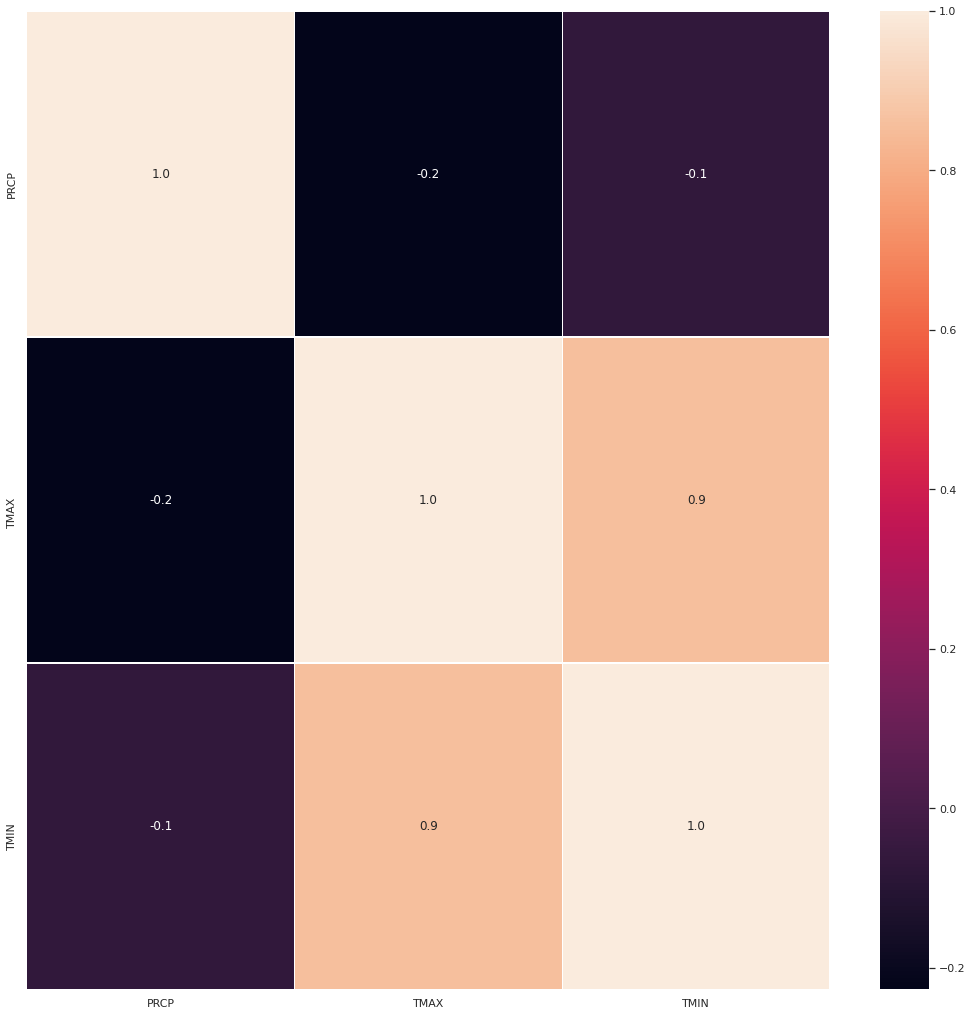

In [28]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

In [29]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2, random_state=0)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [31]:
import warnings
warnings.filterwarnings("ignore")
import keras 
from keras.layers import Dense
from keras.models import Sequential

Using TensorFlow backend.


In [32]:
ann  = Sequential()
ann.add(Dense(units= 32,init= 'uniform', activation = 'relu', input_dim=3))
ann.add(Dense(units= 16,init= 'uniform', activation = 'relu'))
ann.add(Dense(units= 1,init= 'uniform', activation = 'sigmoid'))
ann.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [33]:
ann.fit(xtrain,ytrain, batch_size=10, nb_epoch=10,verbose= 1)

Epoch 1/10
20438/20438 [==============================] - 7s 343us/step - loss: 0.0516 - accuracy: 0.9368
Epoch 2/10
20438/20438 [==============================] - 6s 298us/step - loss: 0.0072 - accuracy: 0.9952
Epoch 3/10
20438/20438 [==============================] - 6s 309us/step - loss: 0.0012 - accuracy: 0.9998
Epoch 4/10
20438/20438 [==============================] - 7s 332us/step - loss: 2.8298e-04 - accuracy: 1.0000
Epoch 5/10
20438/20438 [==============================] - 6s 308us/step - loss: 7.9432e-05 - accuracy: 1.0000
Epoch 6/10
20438/20438 [==============================] - 6s 296us/step - loss: 0.0012 - accuracy: 0.9987
Epoch 7/10
20438/20438 [==============================] - 6s 298us/step - loss: 5.7332e-04 - accuracy: 0.9995
Epoch 8/10
20438/20438 [==============================] - 6s 294us/step - loss: 1.8981e-05 - accuracy: 1.0000
Epoch 9/10
20438/20438 [==============================] - 6s 297us/step - loss: 5.3084e-04 - accuracy: 0.9993
Epoch 10/10
20438/20438 [=

In [35]:
# Predicting the Test set results
y_pred = ann.predict(xtest)
y_pred = (y_pred > 0.5)

In [36]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)

In [37]:
cm

array([[2936,    0],
       [   0, 2174]])

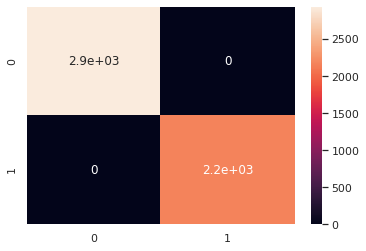

In [38]:
sns.heatmap(cm,annot=True)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_pred)

1.0

In [42]:
accuracy = accuracy_score(ytest,y_pred)*100

In [43]:
accuracy

100.0